In [2]:
%matplotlib inline
from fastai.basics import *

In [3]:
n = 100

In [5]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
# underscore means that we do it inplace
x[:5]

tensor([[0.4317, 1.0000],
        [0.6235, 1.0000],
        [0.3164, 1.0000],
        [0.9714, 1.0000],
        [0.9362, 1.0000]])

In [13]:
a = tensor(-3., -2) # the parameters we need to train neural network to be like

In [14]:
# y = mx + noise
y = x@a + 0.25 * torch.rand(n)

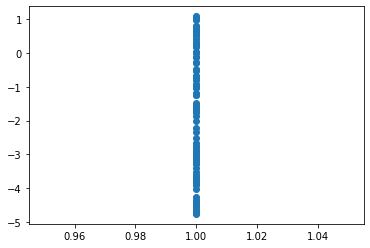

In [17]:
plt.scatter(x[:,1], y)

In [16]:
print(x.shape)

torch.Size([100, 2])


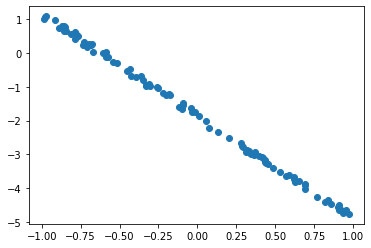

In [18]:
plt.scatter(x[:,0], y)

In [23]:
# defining minimum squared error

def mse(y_hat, y) : return ((y_hat-y)**2).mean()

In [20]:
a = tensor(-1.,1)

In [21]:
y_hat = x@a #prediction on conjecture

In [24]:
mse(y_hat, y)

tensor(9.1413)

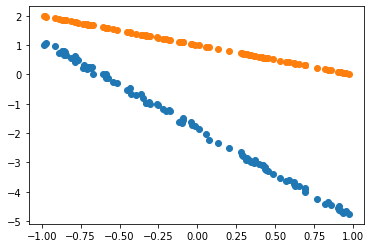

In [25]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat) # this is the initial regession line

In [26]:
# going gradient descent on this guy
a = nn.Parameter(a)

In [29]:
print(a.grad)

None


In [48]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if(t %10 == 0): print(loss) # what is t, look below
  loss.backward() # this calculates gradient
  with torch.no_grad():
    a.sub_(lr * a.grad) 
    # print("agrad: ", a.grad)
    a.grad.zero_()


In [49]:
lr = 1e-1
for t in range(100):
  update()

tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)


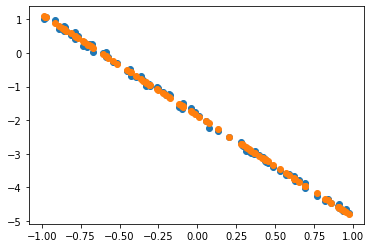

In [33]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a.detach())

# Runtime error without detach()
# Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [34]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [39]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, =plt.plot(x[:, 0], x@a.detach())
# line, means it is a tuple
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

agrad:  tensor([1.1812, 5.5409])
agrad:  tensor([1.1497, 4.4444])
agrad:  tensor([1.1097, 3.5668])
agrad:  tensor([1.0640, 2.8643])
agrad:  tensor([1.0148, 2.3019])
agrad:  tensor([0.9636, 1.8515])
agrad:  tensor([0.9117, 1.4907])
agrad:  tensor([0.8600, 1.2015])
agrad:  tensor([0.8092, 0.9696])
agrad:  tensor([0.7599, 0.7836])
agrad:  tensor([0.7123, 0.6344])
agrad:  tensor([0.6667, 0.5145])
agrad:  tensor([0.6233, 0.4181])
agrad:  tensor([0.5821, 0.3406])
agrad:  tensor([0.5431, 0.2782])
agrad:  tensor([0.5063, 0.2279])
agrad:  tensor([0.4717, 0.1873])
agrad:  tensor([0.4392, 0.1545])
agrad:  tensor([0.4088, 0.1279])
agrad:  tensor([0.3803, 0.1063])
agrad:  tensor([0.3537, 0.0888])
agrad:  tensor([0.3288, 0.0745])
agrad:  tensor([0.3057, 0.0628])
agrad:  tensor([0.2840, 0.0533])
agrad:  tensor([0.2639, 0.0454])
agrad:  tensor([0.2452, 0.0389])
agrad:  tensor([0.2277, 0.0335])
agrad:  tensor([0.2115, 0.0291])
agrad:  tensor([0.1964, 0.0253])
agrad:  tensor([0.1823, 0.0222])
agrad:  te